# Project 13 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from Dr. Ward's video

## Question 1

In [1]:
library(data.table)
library(lubridate)
liquor <- fread('/depot/datamine/data/iowa_liquor_sales/clean_sample.csv')
liquor$date <- mdy(liquor$Date)
liquor$year <- year(liquor$date)
liquor$month <- month(liquor$date)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
head(liquor[,c("State Bottle Cost", "State Bottle Retail")])
typeof(liquor$`State Bottle Cost`)
typeof(liquor$`State Bottle Retail`)

State Bottle Cost,State Bottle Retail
<chr>,<chr>
$18.09,$27.14
$18.09,$27.14
$6.40,$9.60
$35.55,$53.34
$6.40,$9.60
$35.55,$53.34


[1] "character"

[1] "character"

In [3]:
liquor$cost <- as.numeric(gsub('\\$', '', liquor$'State Bottle Cost'))

In [4]:
liquor$retail <- as.numeric(gsub('\\$', '', liquor$'State Bottle Retail'))

In [5]:
liquor$profit <- liquor$retail - liquor$cost

In [6]:
which.max(liquor$profit)

[1] 1471217

In [7]:
liquor$profit[1471217]

[1] 3000

In [10]:
liquor[which(liquor$profit == 3000), ]

Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),date,year,month,cost,retail,profit
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,...,<int>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S28648700001,10/29/2015,2663,Hy-Vee / Urbandale,8701 DOUGLAS,URBANDALE,50322,"8701 DOUGLASURBANDALE 50322(41.629365, -93.739245)",77,Polk,...,1,$9000.00,0.75,0.2,2015-10-29,2015,10,6000,9000,3000
S28648800001,10/29/2015,2561,Hy-Vee Food Store / Fleur / DSM,4605 FLEUR DRIVE,DES MOINES,50321,"4605 FLEUR DRIVEDES MOINES 50321(41.542816, -93.644943)",77,Polk,...,1,$9000.00,0.75,0.2,2015-10-29,2015,10,6000,9000,3000
S28645600001,10/26/2015,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 OAKLAND ROAD NE,CEDAR RAPIDS,52402,"3235 OAKLAND ROAD NECEDAR RAPIDS 52402(42.010972, -91.658105)",57,Linn,...,1,$9000.00,0.75,0.2,2015-10-26,2015,10,6000,9000,3000
S28646300002,10/27/2015,2666,Hy-Vee #2 / Ankeny,2510 SW STATE ST,ANKENY,50023,"2510 SW STATE STANKENY 50023(41.704185, -93.621597)",77,Polk,...,1,$9000.00,0.75,0.2,2015-10-27,2015,10,6000,9000,3000


The maximum profit is 3000 dollars.The date of these maximum profit are 10/29, 10/26, and 10/27, in 2015. The vendor names are Hy-Vee / Urbandale, Hy-Vee Food Store / Fleur / DSM, Hy-Vee Food Store #5 / Cedar Rapids, and Hy-Vee #2 / Ankeny. The number of bottle sold are 1.

## Question 2

In [19]:
createDashboard <- function(Number, DF) {
     myDF <- subset(DF, DF$'Vendor Number'== Number)
     barplot(tapply(myDF$profit, myDF$year, mean))  
}

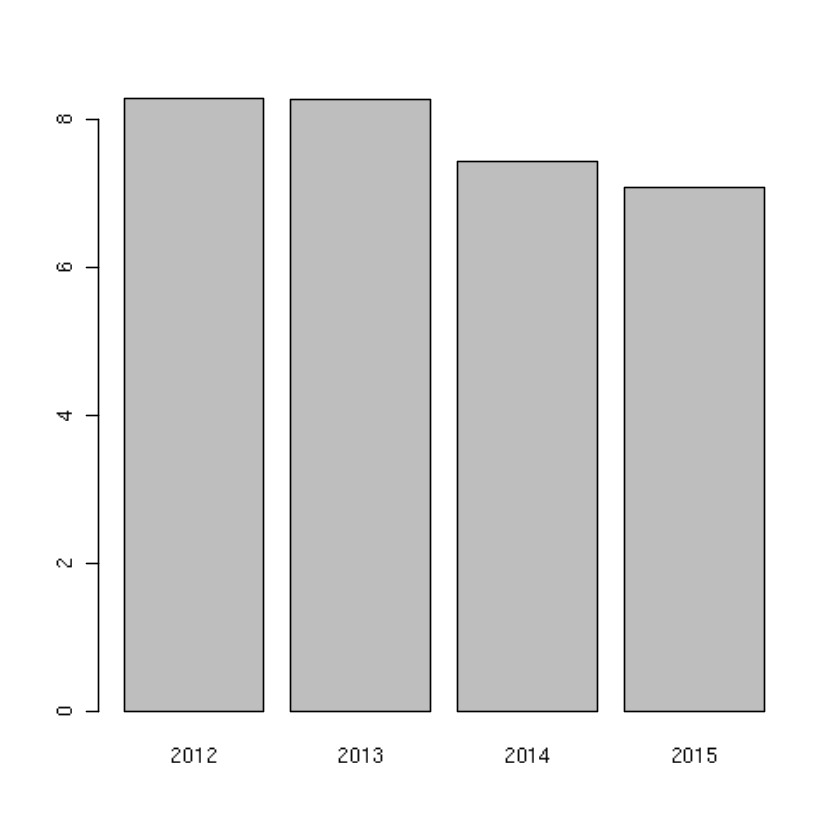

In [20]:
createDashboard(255, liquor)

Here above the function is created.

## Question 3

In [23]:
createDashboard <- function(Number, DF = liquor) {
     myDF <- subset(DF, DF$'Vendor Number'== Number) 
     par(mfrow = c(1,2))
     barplot(tapply(myDF$profit, myDF$year, mean), main= paste("Profit for Vendor", Number)) 
     barplot(tapply(myDF$'Bottle Volume (ml)', myDF$year, sum), main= paste("Bottle Volume for Vendor", Number))
}

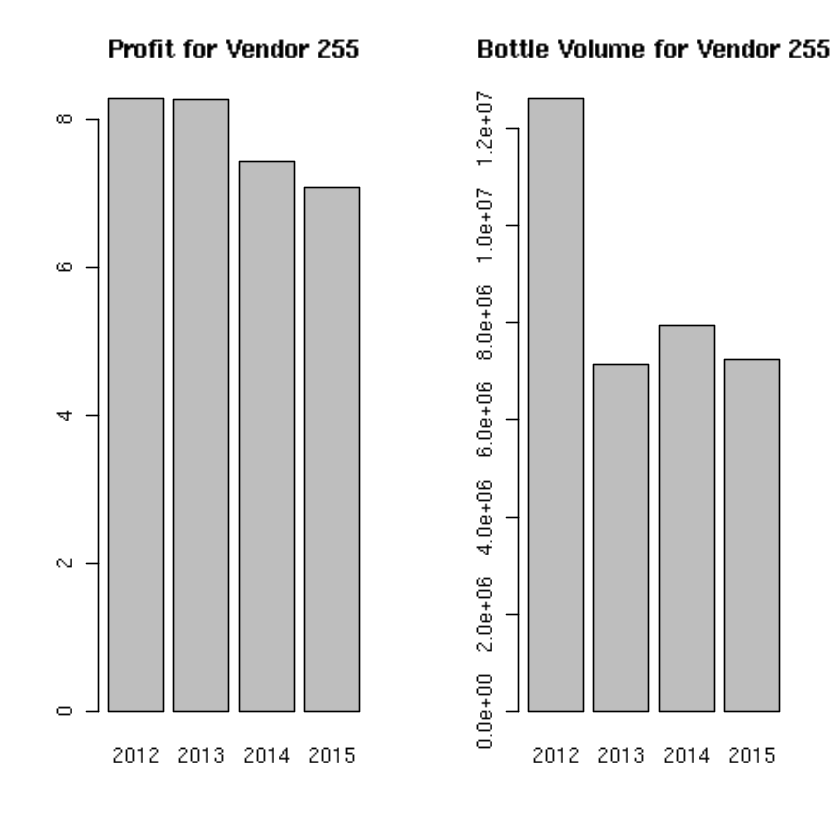

In [24]:
createDashboard(255)

Here above are the results of the modified function.

## Question 4

In [41]:
createDashboard <- function(Number, DF = liquor) {
     myDF <- subset(DF, DF$'Vendor Number'== Number) 
     par(mfrow = c(2,2))
     barplot(tapply(myDF$profit, myDF$year, mean), main= paste("Profit for Vendor", Number)) 
     barplot(tapply(myDF$'Bottle Volume (ml)', myDF$year, sum), main= paste("Bottle Volume for Vendor", Number))
     barplot(tapply(myDF$'Bottles Sold', myDF$month, mean), main= paste("Bottles Sold for Vendor", Number)) 
}

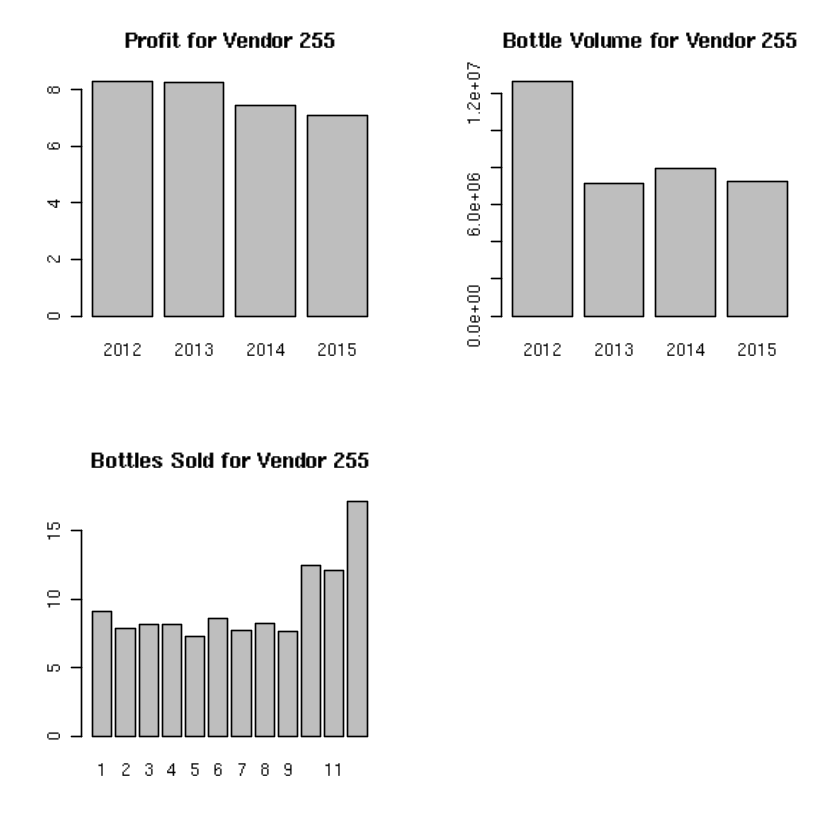

In [42]:
createDashboard(255)

Here, the third plot is created.

## Question 5

In [43]:
createDashboard <- function(Number, DF = liquor) {
     myDF <- subset(DF, DF$'Vendor Number'== Number) 
     par(mfrow = c(2,2))
     barplot(tapply(myDF$profit, myDF$year, mean), main= paste("Profit for Vendor", Number)) 
     barplot(tapply(myDF$'Bottle Volume (ml)', myDF$year, sum), main= paste("Bottle Volume for Vendor", Number))
     barplot(tapply(myDF$'Bottles Sold', myDF$month, mean), main= paste("Bottles Sold for Vendor", Number)) 
     barplot(tapply(myDF$retail, myDF$month, mean), main= paste("Retail for Vendor", Number))
}

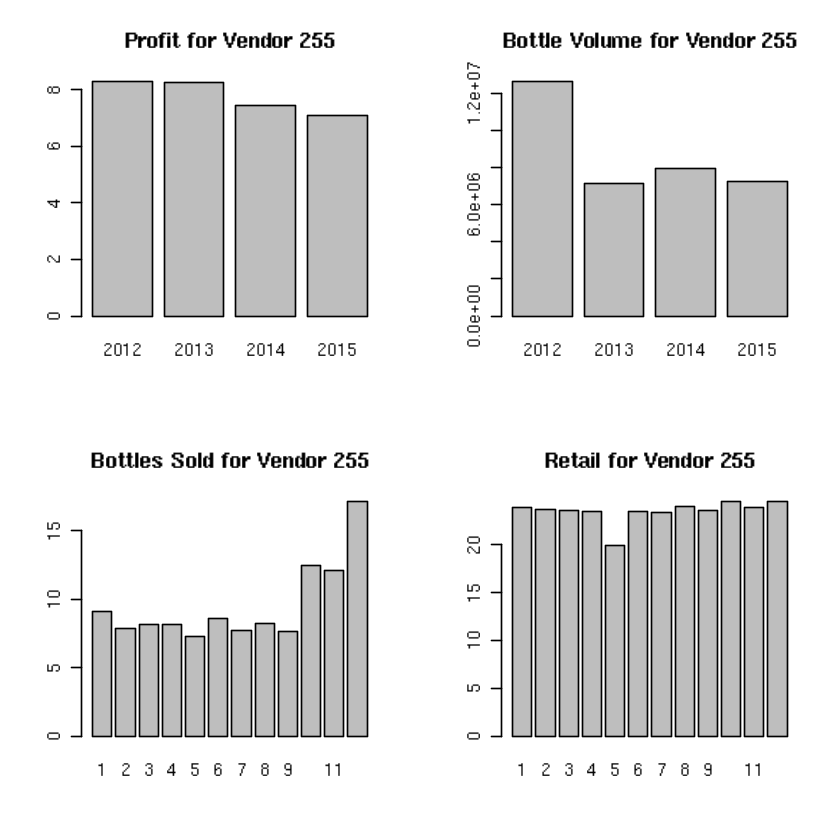

In [44]:
createDashboard(255)

My plot is the average retail amount per month. From the plot we can check which months the sale condition are good and which are not.

## Question 6

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.